# BSC-HGP - Project  


| Course 	           | BSc                   |
|  ------------- :     |:-------------        :|  
| Stage / Year         | 3                     |
| Module 	           | HCI & GUI Programming | 
| Semester             |	1                  |
| Assignment Title     |	Project            | 
| Date of Title Issue  |	13th Nov 2018      |
| Assignment Deadline  |	14th Dec 2018 23:55|
| Assignment %         | 60 % of module        |
| Assignment Submission| Upload via Moodle     |

Author: Alex Cronin

# 1. Introduction

**N.B. You are only awarded marks for what you are asked to do**

In this project you will **WORK IN A GROUP OF 2**. You are asked to produce a Draughts Game using PyQt5. This will allow the user to play a game of Draughts (aka Checkers). Information on the rules of draughts can be found on https://en.wikipedia.org/wiki/Draughts

![title](./img/GUI.png)
Figure: Sample GUI

**NB This figure is a sample GUI included for illustrative purposes only.** 
- It is missing some features and contains some additional features. 
- Although tooltips and a help menu may assist, the app should be intuative and responsive

## 1.1 Rules of Draughts in Brief

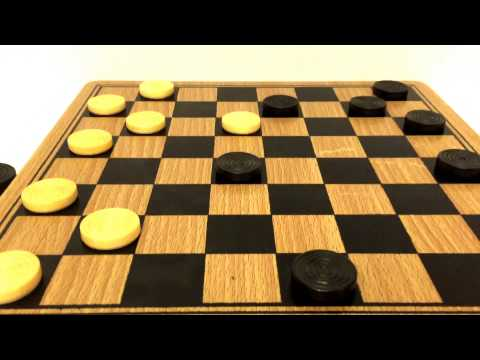

In [1]:
# Code embeds youtube video in Jupyter Notebook
from IPython.lib.display import YouTubeVideo
YouTubeVideo('yFrAN-LFZRU')

## 2. Working in Groups
Please do the following: 
1. Choose your partner today so you can get started
- Email alex.cronin@griffith.ie and CC your partner with the following in the subject line of the email
*BSC-HGP Project Group - FirstName1 LastName1 - StudentNumber1, FirstName2 LastName2 - Student Number2*
- Choose a common development environment, I suggest PyCharm
- If you can use a source code manager to develop and share code please do. I would recommend using *git* if you can (particularly if you have access to a *git* server somewhere where all changes can be uploaded).
- Decide on a development strategy. Try to work on independent parts if you can. Working in parallel will cut the time in half.
- “Weeks of programming can save you hours of planning” a quote from Scott Meyers. Basically it means design the project first before implementing it. This means deciding on your data structures, UI design, view design etc. before you start. Pay particular attention to your data structure for the game board and how you implement the rules. 
- Arrange a time to meet with your partner regularly outside the lab
- Share the following with your partner and other groups in person and on the forum 
    - Useful links 
    - Useful theory 
    - Useful design ideas 
    - Problems
    - Solutions
- Do not share with other group
    - Complete solutions
    - Substantial work that you have completed yourself

# 3. Submission Requirements & Marking Scheme

## 3.1 Submissions
- A single zip file called *FirstName1 LastName1 StudentNumber1, FirstName2 LastName2 Student Number2* containing the following: 
    1. This jupyter notebook with the final sections below the dotted line appropriately edited
    2. Your code folder. As this project requires multiple classes please  submit your code in a folder as well as pasting it into the jupyter notebook. I will be testing it from the folder with PyCharm
    
### 3.1.1 Identical Submissions
Both partners MUST make an identical submission on Moodle. This is achieved by doing the following 

Partner 1 
1. Prepare the folder structure in consultation with partner 2
2. Zip it 
3. Send it to partner 2
4. Upload it to moodle


Partner 2 
1. Recieve zip file
2. Unzip it
3. Examine it
4. If satisfied upload the original zip file. If not satisfied restart the process. DO NOT REZIP THE FILE. N.B. If you rezip the file or make any alterations to the file which was given to you by partner 1 then it will not match when i do an sha1/md5 hash comparison. 
5. Upload it to moodle

## 3.2 Penalties
- **Code that does no run - 30%** - it can be very time consuming to fix errors which prevent the code from running 
- **Use of non standard libraries - 20%** - creating new virtual environments is very time consuming
- **Bugs - 1 to 15%** - if there there are too many bugs in your code, you could get 0% 
- **Late submission** - standard late penalties apply

## 3.3 Tasks 
Tasks are listed below are intended to be completed in order. Skipping a task may result in lower marks being achieved in later sections as your work cannot be properly tested. You should be capable of producing strong and generally robust software. 

N.B. High marks will be awarded for better UIs which embody the principles from the lectures. 

Documentation tasks will be treated separately from coding tasks.

![title](./img/marksbreakdown.png)

# 4 Helpful Resources

## 4.1 Sample Code - Tetris

The sample code is presented and explained in detail at http://zetcode.com/gui/pyqt5/tetris/

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

"""
ZetCode PyQt5 tutorial 

This is a Tetris game clone.

Author: Jan Bodnar
Website: zetcode.com 
Last edited: August 2017
"""

from PyQt5.QtWidgets import QMainWindow, QFrame, QDesktopWidget, QApplication
from PyQt5.QtCore import Qt, QBasicTimer, pyqtSignal
from PyQt5.QtGui import QPainter, QColor 
import sys, random

class Tetris(QMainWindow):
    
    def __init__(self):
        super().__init__()
        
        self.initUI()
        
        
    def initUI(self):    
        '''initiates application UI'''

        self.tboard = Board(self)
        self.setCentralWidget(self.tboard)

        self.statusbar = self.statusBar()        
        self.tboard.msg2Statusbar[str].connect(self.statusbar.showMessage)
        
        self.tboard.start()
        
        self.resize(180, 380)
        self.center()
        self.setWindowTitle('Tetris')        
        self.show()
        

    def center(self):
        '''centers the window on the screen'''
        
        screen = QDesktopWidget().screenGeometry()
        size = self.geometry()
        self.move((screen.width()-size.width())/2, 
            (screen.height()-size.height())/2)
        

class Board(QFrame):
    
    msg2Statusbar = pyqtSignal(str)
    
    BoardWidth = 10
    BoardHeight = 22
    Speed = 300

    def __init__(self, parent):
        super().__init__(parent)
        
        self.initBoard()
        
        
    def initBoard(self):     
        '''initiates board'''

        self.timer = QBasicTimer()
        self.isWaitingAfterLine = False
        
        self.curX = 0
        self.curY = 0
        self.numLinesRemoved = 0
        self.board = []

        self.setFocusPolicy(Qt.StrongFocus)
        self.isStarted = False
        self.isPaused = False
        self.clearBoard()
        
        
    def shapeAt(self, x, y):
        '''determines shape at the board position'''
        
        return self.board[(y * Board.BoardWidth) + x]

        
    def setShapeAt(self, x, y, shape):
        '''sets a shape at the board'''
        
        self.board[(y * Board.BoardWidth) + x] = shape
        

    def squareWidth(self):
        '''returns the width of one square'''
        
        return self.contentsRect().width() // Board.BoardWidth
        

    def squareHeight(self):
        '''returns the height of one square'''
        
        return self.contentsRect().height() // Board.BoardHeight
        

    def start(self):
        '''starts game'''
        
        if self.isPaused:
            return

        self.isStarted = True
        self.isWaitingAfterLine = False
        self.numLinesRemoved = 0
        self.clearBoard()

        self.msg2Statusbar.emit(str(self.numLinesRemoved))

        self.newPiece()
        self.timer.start(Board.Speed, self)

        
    def pause(self):
        '''pauses game'''
        
        if not self.isStarted:
            return

        self.isPaused = not self.isPaused
        
        if self.isPaused:
            self.timer.stop()
            self.msg2Statusbar.emit("paused")
            
        else:
            self.timer.start(Board.Speed, self)
            self.msg2Statusbar.emit(str(self.numLinesRemoved))

        self.update()

        
    def paintEvent(self, event):
        '''paints all shapes of the game'''
        
        painter = QPainter(self)
        rect = self.contentsRect()

        boardTop = rect.bottom() - Board.BoardHeight * self.squareHeight()

        for i in range(Board.BoardHeight):
            for j in range(Board.BoardWidth):
                shape = self.shapeAt(j, Board.BoardHeight - i - 1)
                
                if shape != Tetrominoe.NoShape:
                    self.drawSquare(painter,
                        rect.left() + j * self.squareWidth(),
                        boardTop + i * self.squareHeight(), shape)

        if self.curPiece.shape() != Tetrominoe.NoShape:
            
            for i in range(4):
                
                x = self.curX + self.curPiece.x(i)
                y = self.curY - self.curPiece.y(i)
                self.drawSquare(painter, rect.left() + x * self.squareWidth(),
                    boardTop + (Board.BoardHeight - y - 1) * self.squareHeight(),
                    self.curPiece.shape())

                    
    def keyPressEvent(self, event):
        '''processes key press events'''
        
        if not self.isStarted or self.curPiece.shape() == Tetrominoe.NoShape:
            super(Board, self).keyPressEvent(event)
            return

        key = event.key()
        
        if key == Qt.Key_P:
            self.pause()
            return
            
        if self.isPaused:
            return
                
        elif key == Qt.Key_Left:
            self.tryMove(self.curPiece, self.curX - 1, self.curY)
            
        elif key == Qt.Key_Right:
            self.tryMove(self.curPiece, self.curX + 1, self.curY)
            
        elif key == Qt.Key_Down:
            self.tryMove(self.curPiece.rotateRight(), self.curX, self.curY)
            
        elif key == Qt.Key_Up:
            self.tryMove(self.curPiece.rotateLeft(), self.curX, self.curY)
            
        elif key == Qt.Key_Space:
            self.dropDown()
            
        elif key == Qt.Key_D:
            self.oneLineDown()
            
        else:
            super(Board, self).keyPressEvent(event)
                

    def timerEvent(self, event):
        '''handles timer event'''
        
        if event.timerId() == self.timer.timerId():
            
            if self.isWaitingAfterLine:
                self.isWaitingAfterLine = False
                self.newPiece()
            else:
                self.oneLineDown()
                
        else:
            super(Board, self).timerEvent(event)

            
    def clearBoard(self):
        '''clears shapes from the board'''
        
        for i in range(Board.BoardHeight * Board.BoardWidth):
            self.board.append(Tetrominoe.NoShape)

        
    def dropDown(self):
        '''drops down a shape'''
        
        newY = self.curY
        
        while newY > 0:
            
            if not self.tryMove(self.curPiece, self.curX, newY - 1):
                break
                
            newY -= 1

        self.pieceDropped()
        

    def oneLineDown(self):
        '''goes one line down with a shape'''
        
        if not self.tryMove(self.curPiece, self.curX, self.curY - 1):
            self.pieceDropped()
            

    def pieceDropped(self):
        '''after dropping shape, remove full lines and create new shape'''
        
        for i in range(4):
            
            x = self.curX + self.curPiece.x(i)
            y = self.curY - self.curPiece.y(i)
            self.setShapeAt(x, y, self.curPiece.shape())

        self.removeFullLines()

        if not self.isWaitingAfterLine:
            self.newPiece()
            

    def removeFullLines(self):
        '''removes all full lines from the board'''
        
        numFullLines = 0
        rowsToRemove = []

        for i in range(Board.BoardHeight):
            
            n = 0
            for j in range(Board.BoardWidth):
                if not self.shapeAt(j, i) == Tetrominoe.NoShape:
                    n = n + 1

            if n == 10:
                rowsToRemove.append(i)

        rowsToRemove.reverse()
        

        for m in rowsToRemove:
            
            for k in range(m, Board.BoardHeight):
                for l in range(Board.BoardWidth):
                        self.setShapeAt(l, k, self.shapeAt(l, k + 1))

        numFullLines = numFullLines + len(rowsToRemove)

        if numFullLines > 0:
            
            self.numLinesRemoved = self.numLinesRemoved + numFullLines
            self.msg2Statusbar.emit(str(self.numLinesRemoved))
                
            self.isWaitingAfterLine = True
            self.curPiece.setShape(Tetrominoe.NoShape)
            self.update()
            

    def newPiece(self):
        '''creates a new shape'''
        
        self.curPiece = Shape()
        self.curPiece.setRandomShape()
        self.curX = Board.BoardWidth // 2 + 1
        self.curY = Board.BoardHeight - 1 + self.curPiece.minY()
        
        if not self.tryMove(self.curPiece, self.curX, self.curY):
            
            self.curPiece.setShape(Tetrominoe.NoShape)
            self.timer.stop()
            self.isStarted = False
            self.msg2Statusbar.emit("Game over")



    def tryMove(self, newPiece, newX, newY):
        '''tries to move a shape'''
        
        for i in range(4):
            
            x = newX + newPiece.x(i)
            y = newY - newPiece.y(i)
            
            if x < 0 or x >= Board.BoardWidth or y < 0 or y >= Board.BoardHeight:
                return False
                
            if self.shapeAt(x, y) != Tetrominoe.NoShape:
                return False

        self.curPiece = newPiece
        self.curX = newX
        self.curY = newY
        self.update()
        
        return True
        

    def drawSquare(self, painter, x, y, shape):
        '''draws a square of a shape'''        
        
        colorTable = [0x000000, 0xCC6666, 0x66CC66, 0x6666CC,
                      0xCCCC66, 0xCC66CC, 0x66CCCC, 0xDAAA00]

        color = QColor(colorTable[shape])
        painter.fillRect(x + 1, y + 1, self.squareWidth() - 2, 
            self.squareHeight() - 2, color)

        painter.setPen(color.lighter())
        painter.drawLine(x, y + self.squareHeight() - 1, x, y)
        painter.drawLine(x, y, x + self.squareWidth() - 1, y)

        painter.setPen(color.darker())
        painter.drawLine(x + 1, y + self.squareHeight() - 1,
            x + self.squareWidth() - 1, y + self.squareHeight() - 1)
        painter.drawLine(x + self.squareWidth() - 1, 
            y + self.squareHeight() - 1, x + self.squareWidth() - 1, y + 1)


class Tetrominoe(object):
    
    NoShape = 0
    ZShape = 1
    SShape = 2
    LineShape = 3
    TShape = 4
    SquareShape = 5
    LShape = 6
    MirroredLShape = 7


class Shape(object):
    
    coordsTable = (
        ((0, 0),     (0, 0),     (0, 0),     (0, 0)),
        ((0, -1),    (0, 0),     (-1, 0),    (-1, 1)),
        ((0, -1),    (0, 0),     (1, 0),     (1, 1)),
        ((0, -1),    (0, 0),     (0, 1),     (0, 2)),
        ((-1, 0),    (0, 0),     (1, 0),     (0, 1)),
        ((0, 0),     (1, 0),     (0, 1),     (1, 1)),
        ((-1, -1),   (0, -1),    (0, 0),     (0, 1)),
        ((1, -1),    (0, -1),    (0, 0),     (0, 1))
    )

    def __init__(self):
        
        self.coords = [[0,0] for i in range(4)]
        self.pieceShape = Tetrominoe.NoShape

        self.setShape(Tetrominoe.NoShape)
        

    def shape(self):
        '''returns shape'''
        
        return self.pieceShape
        

    def setShape(self, shape):
        '''sets a shape'''
        
        table = Shape.coordsTable[shape]
        
        for i in range(4):
            for j in range(2):
                self.coords[i][j] = table[i][j]

        self.pieceShape = shape
        

    def setRandomShape(self):
        '''chooses a random shape'''
        
        self.setShape(random.randint(1, 7))

        
    def x(self, index):
        '''returns x coordinate'''
        
        return self.coords[index][0]

        
    def y(self, index):
        '''returns y coordinate'''
        
        return self.coords[index][1]

        
    def setX(self, index, x):
        '''sets x coordinate'''
        
        self.coords[index][0] = x

        
    def setY(self, index, y):
        '''sets y coordinate'''
        
        self.coords[index][1] = y

        
    def minX(self):
        '''returns min x value'''
        
        m = self.coords[0][0]
        for i in range(4):
            m = min(m, self.coords[i][0])

        return m

        
    def maxX(self):
        '''returns max x value'''
        
        m = self.coords[0][0]
        for i in range(4):
            m = max(m, self.coords[i][0])

        return m

        
    def minY(self):
        '''returns min y value'''
        
        m = self.coords[0][1]
        for i in range(4):
            m = min(m, self.coords[i][1])

        return m

        
    def maxY(self):
        '''returns max y value'''
        
        m = self.coords[0][1]
        for i in range(4):
            m = max(m, self.coords[i][1])

        return m

        
    def rotateLeft(self):
        '''rotates shape to the left'''
        
        if self.pieceShape == Tetrominoe.SquareShape:
            return self

        result = Shape()
        result.pieceShape = self.pieceShape
        
        for i in range(4):
            
            result.setX(i, self.y(i))
            result.setY(i, -self.x(i))

        return result

        
    def rotateRight(self):
        '''rotates shape to the right'''
        
        if self.pieceShape == Tetrominoe.SquareShape:
            return self

        result = Shape()
        result.pieceShape = self.pieceShape
        
        for i in range(4):
            
            result.setX(i, -self.y(i))
            result.setY(i, self.x(i))

        return result


if __name__ == '__main__':
    
    app = QApplication([])
    tetris = Tetris()    
    sys.exit(app.exec_())

PyQt5.QtCore.QPoint(245, 383)


## 4.2. Suggested way to begin 
1. Get the sample code running 
- Sit with your partner and try to understand the sample code while commenting it thoroughly
- Make a list of the changes that you think you will need to make to turn it into a game of draughts
    - The things you will need to add/adapt
    - The things that you will need remove
- Make small changes and test regularly. 
- Backup working versions of your code regularly.

## 4.3 Some changes/additions that you could make at the beginning
1. Change the following 
    - main class 
    - window title, 
    - size, 
    - board height & width,  
    - include a 2D int array in the board class to store the poitions of the pieces, you can then loop through this array to paint the pieces.
    - Tetrominoe class to something meaning full like Piece 
    - remove most of the Shape class as it is not needed
    - add a mouse click event
    - add a toolbar
    - display the timer in the status bar or in a widget
    - add a method to draw the board graphically 
    - add a method to draw the initial pieces 
    - list method names that you think that you will need and include comments on what you think they will do
    - expand the tryMove method to contain your game logic or make a class called GameLogic
    
N.B. Additional structural hints and code snippets will be provided but you must make a start this week.

## 4.4 Helpful Sample Code - From Zetcode 
- http://zetcode.com/gui/pyqt5/
    - http://zetcode.com/gui/pyqt5/tetris/
    - http://zetcode.com/gui/pyqt5/menustoolbars/
    - http://zetcode.com/gui/pyqt5/dialogs/
    - http://zetcode.com/gui/pyqt5/painting/
    - http://zetcode.com/gui/pyqt4/layoutmanagement/

# 5 Other Useful Links

### Python Documenation
- https://doc.qt.io/qt-5/qwidget.html
- Modules: https://doc.qt.io/qt-5/qtmodules.html 

### Icons
- 32x32 pngs from -  https://www.flaticon.com/

### Markdown
- Markdown cheat sheet: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet
- Markdown table builder: https://www.tablesgenerator.com/markdown_tables

### How to Document Your code 
- https://realpython.com/documenting-python-code/ (you can just use # and a good explaination!)

# -------- Delete all above this line and submit the section below-----------
# Submission by: FirstName1 LastName1 - StudentNumber1, FirstName2 LastName2 - Student Number2
update the above to you and your partners name and student numbers

## Summary of Division of Work
* Student 1 Name & Number: 					
* Student 2 Name & Number: 

Please complete the sections below with regard to the estimate of the division of work between the two partners
If the work was split in the range of 45% to 55% per partner then that is fine and simply say “Work was evenly divided”. If this was not the case then state with a summary sentence. This is the important statement of this file.

**Division of work:** work was evenly divided 


### Code repository 
Paste image of log here if appropriate

### Percentage of work completed by each partner on each class / task 
Some area require more work than others so this is only for reference. An average of these values will not be calculated.

| Class name/Task 	| Student Name 1 	| Student Name 2 	|
|--------------------------------	|----------------	|----------------	|
| Draughts 	        |10%  	| 90% 	|
| Board 	        | 90% 	|  10%	|
| Piece 	        |  .	|  	.|
| System Design 	 |  .	|  	.|
| Git hub repository 	|.  	| . 	|
| Learning the rules of Draughts 	| . 	| . 	|
| Writing the rules in logic  	|  .	|  .	|


 


## Solution (tasks 1 to 9)
Place your solution in the cell(s) below
Include any error message or any special comments in this cell

In [3]:
# Your solution goes here, you can add additional cells if you want. 
# Make sure that you code is submitted in a project folder as well as pasted here. 
# It will be tested in the project folder usig PyCharm.
# Be sure to comment code in detail to gain documentation marks

## Design Decisions:  (task 10) 
Explain any specific customizations you made. Template will be provided with appropriate headings.

## Screen Shots of working Project x 5
Include 5 screen shots of your project, so that if it is not working correctly, I have some idea of what it is supposed to look like/do.Specific list of screen shorts will be provided.